# Assignment 6

In [51]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

#path = 'drive/My Drive/Linguistics MS/INFO 5502/'




# 1. The Bootstrap and The Normal Curve


---


In this exercise, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas. We will be interested in determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [53]:
# Just run this cell.

pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"



Run the cell below to plot a histogram of the scores from pop_restaurants.

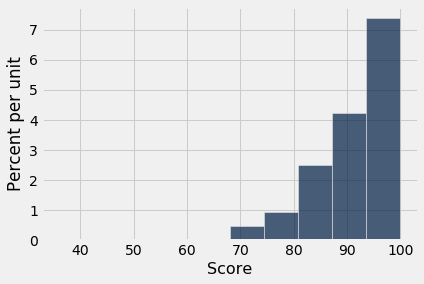

In [54]:
pop_restaurants.hist('Score')

This is the population mean:

In [55]:
pop_mean = np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

Often it is impossible to find complete datasets like this. Imagine we instead had access only to a random sample of 100 restaurant inspections, called restaurant_sample. That table is created below. We are interested in using this sample to estimate the population mean.

In [56]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Cindy's Gone Hog Wild,78612,09/22/2014,81,"5496 E SH 71 EB AUSTIN, TX 78612 (30.178602, -97.533716)"
Hecho En Mexico,78749,08/03/2016,74,"6001 W WILLIAM CANNON DR Bunit 301 AUSTIN, TX 78749 (30. ..."
Cherry Creek Catfish Company,78745,07/19/2016,86,"5700 MANCHACA RD Unit 200 AUSTIN, TX 78745 (30.214318, - ..."
Taco Cabana #293,78726,08/13/2014,97,"7409 N FM 620 RD Bldg 3 AUSTIN, TX 78726 (30.407229, -97 ..."
El Michoacano Mexican Rest.,78617,06/16/2016,78,"2701 E SH 71 WB AUSTIN, TX 78617 (30.211194, -97.654931)"
Boone Elementary,78749,01/23/2015,93,"8101 CROFTWOOD DR AUSTIN, TX 78749 (30.204034, -97.840871)"
LW - Circle K Store #2704681,78734,06/27/2014,88,"1405 S FM 620 RD LAKEWAY, TX 78734 (30.34937, -97.963575)"
Cafe Malta,78745,04/20/2015,84,"3421 W WILLIAM CANNON DR Unit 127 AUSTIN, TX 78745 (30.2 ..."
Shangri-La,78702,03/29/2016,96,"1016 E 6TH ST AUSTIN, TX 78702 (30.264806, -97.731651)"
Schlotzsky's Deli,78745,06/30/2014,86,"111 W WILLIAM CANNON DR AUSTIN, TX 78745 (30.193122, -97 ..."


Run the cell below to plot a histogram of the sample scores from restaurant_sample.

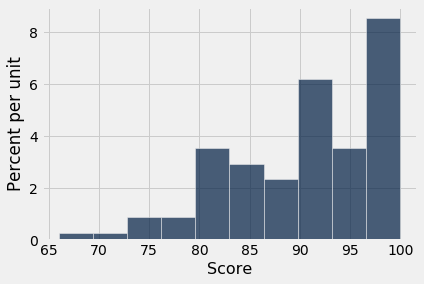

In [57]:
restaurant_sample.hist('Score')

This is the sample mean:

In [58]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

90.51

### Question 1

Complete the function one_resampled_mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.

In [59]:
def one_resampled_mean(data):
    resampled_data = data.sample(100, with_replacement=False)
    sample_mean = np.mean(resampled_data.column('Score'))
    return sample_mean

this_mean = one_resampled_mean(pop_restaurants)
this_mean

90.74


### Question 2

Complete the function bootstrap_scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant_sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.

In [60]:
def bootstrap_scores():  
  resampled_means = make_array()
  for i in range(5000):
    resampled_data = restaurant_sample.sample(100, with_replacement=True)
    resampled_mean = one_resampled_mean(resampled_data)
    resampled_means = np.append(resampled_means, resampled_mean)
  return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([91.69, 90.12, 91.22, ..., 90.27, 90.19, 89.57])

Take a look at the histogram of the resampled means.

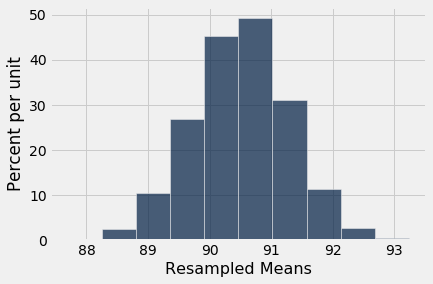

In [61]:
Table().with_column('Resampled Means', resampled_means).hist()

### Question 3

Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

In [62]:
lower_bound = np.round(percentile(2.5, resampled_means), 2)
upper_bound = np.round(percentile(97.5, resampled_means), 2)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 88.95 , 91.99 )



### Question 4

What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape?


---
The histogram is displaying the means of 5000 bootstrapped resamplings of our original 100-restaurant sample. These are taken WITH replacement, because if we bootstrap without replacement, the mean will be the same all 5000 times. It appears to be normally distributed under a bell curve because of the Central Limit Theorem: even though we're taking a tiny sample (100) from a very large population (all the restaurant scores) and there's no way this tiny sample can be truly representative of the population, the distribution of the means of large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population.

### Question 5


---
No, the **sampled scores** do not have a normal bell shape; instead, they cluster in an increasing slope toward 100. This is not an unexpected result, since for the resampled means to have a normal distribution under the central limit theorem, it is not necessary for the population they came from to be normally distributed.


### Question 6


---


Without referencing the array resampled_means or performing any new simulations, calculate an interval around the sample_mean that covers approximately 95% of the numbers in the resampled_means array. You may use the following values to compute your result, but you should not perform additional resampling - think about how you can use the CLT to accomplish this.



In [63]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

# Since the STD of the restaurant samples is 7.59, we can calculate +/- 2 Standard units to get a 95% interval
sd_of_means = sample_sd*2
lower_bound_normal = sample_mean - sd_of_means
upper_bound_normal = sample_mean + sd_of_means
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 75.00388507717037 , 106.01611492282964 )


# 2. Testing the Central Limit Theorem


---


To recap the properties we just saw: The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.


### Question 1. Define the function one_statistic_prop_heads which should return exactly one simulated statistic of the proportion of heads from $n$ coin flips.

In [64]:
coin = Table().with_columns(
    "Flip", make_array('Heads', 'Tails'),
    "Chance", make_array(0.5,        0.5))

def one_statistic_prop_heads(n):
    prop_heads = coin.sample_from_distribution("Chance", n)
    return np.round((prop_heads.column(2)[1]/n) * 100, 2)

one_statistic_prop_heads(100)

46.0

### Question 2. The CLT only applies when sample sizes are "sufficiently large." 

This isn't a very precise statement. Is 10 large? How about 50? The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say Heads is $1$ and Tails is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which definitely doesn't match our definition of a normal distribution. The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses (which is equivalent to the mean value of the coin tosses), so the CLT should hold true if we compute the sample proportion of heads many times.

Write a function called sample_size_n that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [65]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5) # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = coin.sample_from_distribution("Chance", n)
        heads_proportions = np.append(heads_proportions, np.round((prop_heads.column(2)[1]/n) * 100, 2))
    return heads_proportions

sample_size_n(5000)

array([50.18, 51.32, 50.48, ..., 47.92, 50.04, 50.54])

### Question 4: Write a function called empirical_sample_mean_sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the flight delays dataset, and it should return the standard deviation of the means of those 500 samples.

Hint: This function will be similar to the sample_size_n function you wrote earlier.

In [73]:
delays = Table().read_table('united_summer2015.csv')

def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = delays.sample(n, with_replacement=False)
        sample_mean = np.mean(sample.column('Delay'))
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

13.438131126016

### Question 5: Now, write a function called predict_sample_mean_sd...

 to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed here in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the flight delays (represented in the table united).

In [88]:
repetitions = 10000

def predict_sample_mean_sd(n):
    means = make_array()
    for i in np.arange(repetitions):
      means = np.append(means, np.mean(delays.sample(n).column('Delay')))
    standard = np.std(means)
    return standard

predict_sample_mean_sd(500)

1.7542510554543895

The code above reflects the property of the standard deviations of sample means: the larger the sample, the more the means of the sample cluster around center (and therefore, the smaller the Standard Deviation is). When taking 10 samples, the SD was over 12, but at 500 samples, it is only 1.75